# **แสดงไฟล์ CSV ของ Train Data**

In [ ]:
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/My Drive/Colab Notebooks')

In [ ]:
dftrain = pd.read_csv('CP462_Final_Project/Train_LoanData.csv')

In [ ]:
dftrain.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
dftrain = pd.read_csv('CP462_Final_Project/Train_LoanData.csv')

In [ ]:
dftrain.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# **แสดงไฟล์ CSV ของ Test Data**

In [ ]:
dftest = pd.read_csv('CP462_Final_Project/Test_LoanData.csv')
dftest.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


# **สำรวจข้อมูล Loan Data ของ Train data**

In [ ]:
dftrain.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
dftrain['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

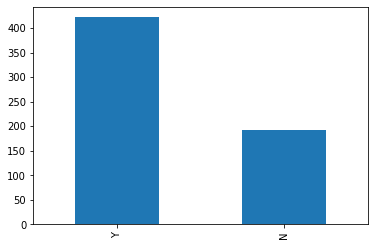

In [ ]:
#กราฟแสดงข้อมูลการอนุมัติให้กู้เงิน(ตัวแปรตาม)
dftrain['Loan_Status'].value_counts().plot.bar()

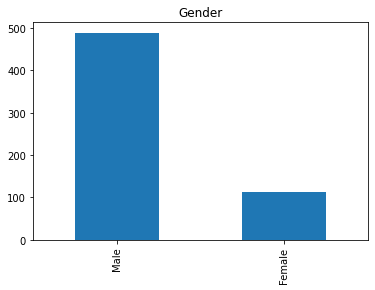

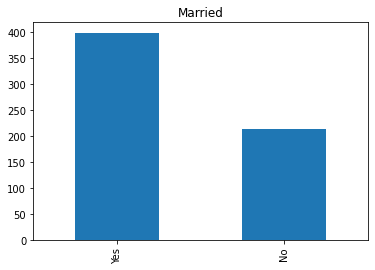

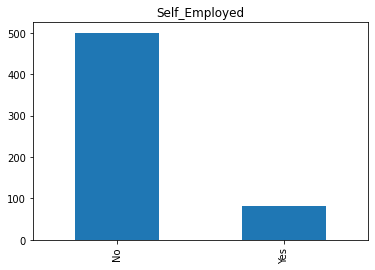

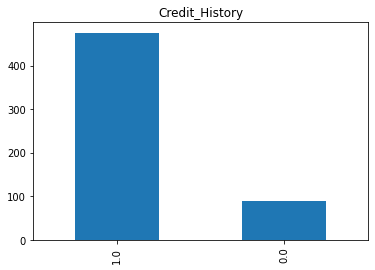

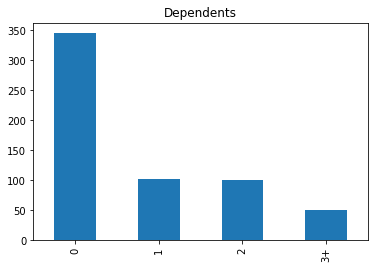

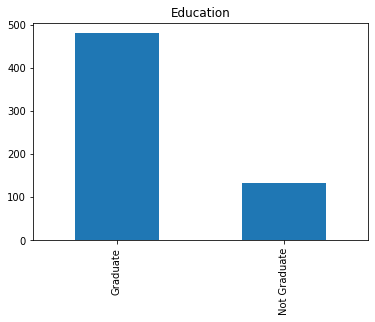

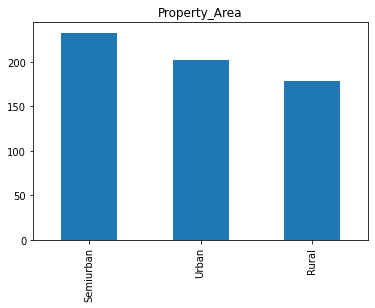

In [ ]:
#กราฟแสดง Feature ที่เป็น Categorical
dftrain['Gender'].value_counts().plot.bar(title='Gender')
plt.show()
dftrain['Married'].value_counts().plot.bar(title='Married')
plt.show()
dftrain['Self_Employed'].value_counts().plot.bar(title='Self_Employed')
plt.show()
dftrain['Credit_History'].value_counts().plot.bar(title='Credit_History')
plt.show()
dftrain['Dependents'].value_counts().plot.bar(title='Dependents')
plt.show()
dftrain['Education'].value_counts().plot.bar(title='Education')
plt.show()
dftrain['Property_Area'].value_counts().plot.bar(title='Property_Area')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


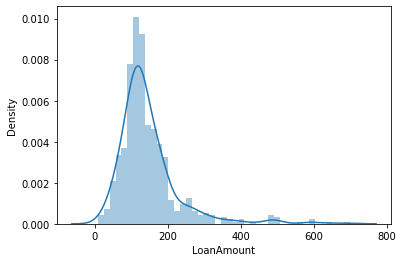

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


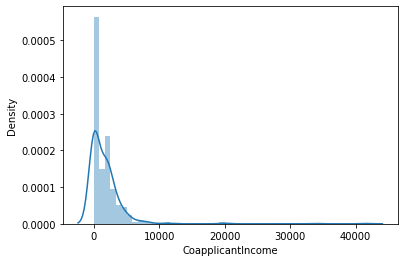

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


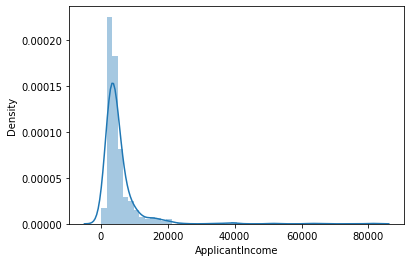

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


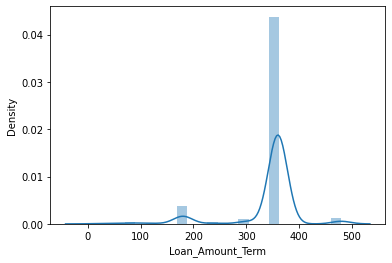

In [ ]:
#กราฟแสดง Feature ที่เป็น Numerical
dftrain.notna()
sns.distplot(dftrain['LoanAmount'])
plt.show()

sns.distplot(dftrain['CoapplicantIncome'])
plt.show()

sns.distplot(dftrain['ApplicantIncome'])
plt.show()

sns.distplot(dftrain['Loan_Amount_Term'])
plt.show()



LoanAmount              AxesSubplot(0.125,0.536818;0.352273x0.343182)
CoapplicantIncome    AxesSubplot(0.547727,0.536818;0.352273x0.343182)
ApplicantIncome            AxesSubplot(0.125,0.125;0.352273x0.343182)
Loan_Amount_Term        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

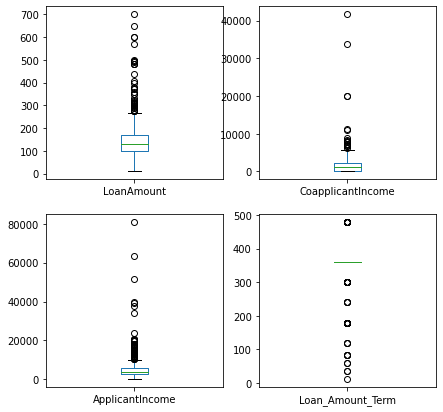

In [ ]:
dftrain[['LoanAmount','CoapplicantIncome','ApplicantIncome','Loan_Amount_Term']].plot(kind = 'box',subplots=True,layout =(2,2),figsize = (7,7))

จะเห็นว่าข้อมูลที่เป็น วงเงินกู้(LoanAmout),ผู้กู้(Applicantincome),ผู้ค้ำกู้(Coapplicatincome) มีค่า outlier ค่อนข้างมาก

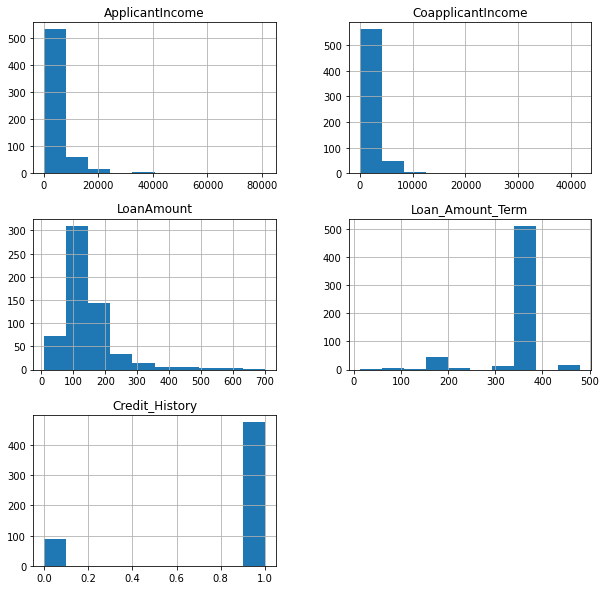

In [ ]:
dftrain.hist(figsize=(10,10))
plt.show()

# **ดูความสัมพันธ์ระหว่าง Feature กับ Label**

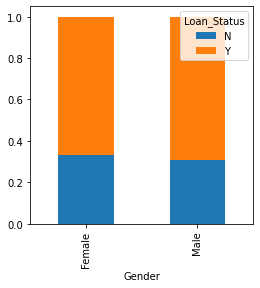

In [ ]:
#ความสัมพันธ์ระหว่างเพศกับการอนุมัติให้กู้
GL=pd.crosstab(dftrain['Gender'],dftrain['Loan_Status'])
GL.div(GL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

จะเห็นว่าเพศเหมือนจะไม่มีผลต่อการอนุมัติให้กู้มากเท่าไร

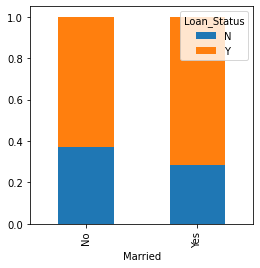

In [ ]:
#ความสัมพันธ์ระหว่างสถานะกับการอนุมัติให้กู้
Mal =pd.crosstab(dftrain['Married'],dftrain['Loan_Status'])
Mal.div(Mal.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()




ผู้ที่แต่งงานแล้วได้รับอนุมัติการให้กู้น้อยกว่าผู้ที่ยังไม่แต่งงาน

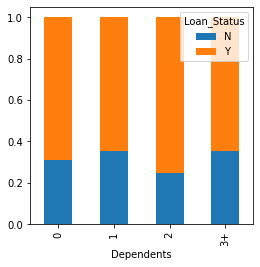

In [ ]:
#ความสัมพันธ์ระหว่างผู้ที่มีบุตรกับการอนุมัติให้กู้
DL=pd.crosstab(dftrain['Dependents'],dftrain['Loan_Status'])
DL.div(DL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

การมีบุตรเหมือนจะไม่มีความสัมพันธ์กับการอนุมัติให้กู้ยืมมาก

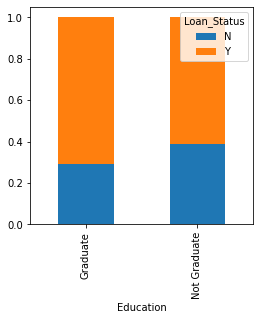

In [ ]:
#ความสัมพันธ์ระหว่างการศึกษากับการอนุมัติให้กู้
EL=pd.crosstab(dftrain['Education'],dftrain['Loan_Status'])
EL.div(EL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

ผู้ที่จบการศึกษาแล้ว มักได้รับการอนุมัติให้กู้

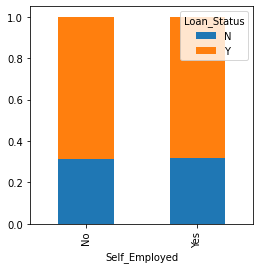

In [ ]:
#ความสัมพันธ์ระหว่างการประกอบอาชีพส่วนตัวกับการอนุมัติให้กู้
SL=pd.crosstab(dftrain['Self_Employed'],dftrain['Loan_Status'])
SL.div(SL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()


เหมือนว่าการประกอบอาชีพส่วนตัวจะไม่มีผลต่อการให้กู้มากเท่าไร

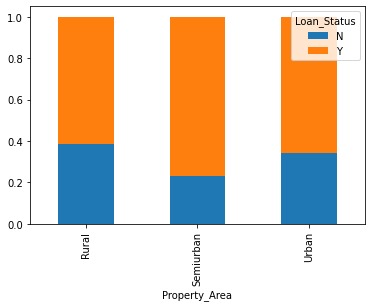

In [ ]:
#ความสัมพันธ์ระหว่างการเขตที่อาศัยกับการอนุมัติให้กู้
PL=pd.crosstab(dftrain['Property_Area'],dftrain['Loan_Status'])
PL.div(PL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.show()

ผู้ที่อาศัยอยู่เขตกึ่งเมืองได้รับการอนุมัติให้กู้มากกว่าในเมืองและชนบท

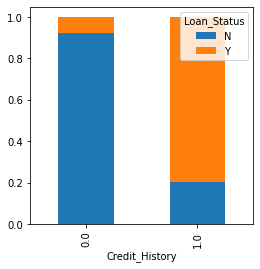

In [ ]:
#ความสัมพันธ์ระหว่างผู้มีประวัติบัตรเครดิตกับการอนุมัติให้กู้
CL=pd.crosstab(dftrain['Credit_History'],dftrain['Loan_Status'])
CL.div(CL.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.show()

กว่า 80% ของผู้ที่มีประวัติบัตรเครดิตเป็น 1 ได้รับอนุมัติให้กู้ 

# **หาค่าความสัมพันธ์ของ Feature ที่มีแนวโน้ม**

In [ ]:
dftrain['Dependents'].replace('3+', 3,inplace=True)
dftrain['Loan_Status'].replace('N', 0,inplace=True)
dftrain['Loan_Status'].replace('Y', 1,inplace=True)




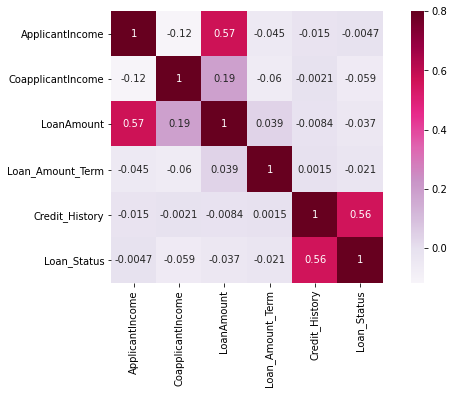

In [ ]:
matrix = dftrain.corr()
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(matrix,vmax=.8,square=True,cmap="PuRd", annot = True)

จะเห็นได้อย่างชัดเจนว่า Feature ที่มีค่าความสัมพันธ์กัน ได้แก่ Loan_Status กับ Credit_history , LoanAmout กับ Applicationcome

# **การ Clean Data เพื่อนำไปใช้ทำนาย**

In [ ]:
df_pre = dftrain.copy()
df_pre.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

ข้อมูลตอนนี้มีค่า NULL เป็นจำนวนมาก จึงไม่เหมาะสม หากจะดรอปทิ้ง เพราะจะทำให้มีข้อมูลที่ใช้ในการ Train น้อยลง

In [ ]:
df_pre.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


แทนที่ค่า NUll ด้วยค่าเฉลี่ยใน Feature ที่สามารถหาค่าเฉลี่ย

In [ ]:
MeanLoan = np.mean(df_pre.LoanAmount)
df_pre.LoanAmount = df_pre.LoanAmount.fillna(MeanLoan)
MeanLoan1 = np.mean(dftest.LoanAmount)
dftest.LoanAmount = dftest.LoanAmount.fillna(MeanLoan1)
dftest.isnull().sum()


Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

ส่วนค่าที่เป็น category ใช้วิธีการเลือกตัวที่เยอะที่สุด แทนในค่า NULL

In [ ]:
df_pre['Gender'].fillna(df_pre['Gender'].mode()[0], inplace=True)
df_pre['Married'].fillna(df_pre['Married'].mode()[0], inplace=True)
df_pre['Dependents'].fillna(df_pre['Dependents'].mode()[0], inplace=True)
df_pre['Self_Employed'].fillna(df_pre['Self_Employed'].mode()[0], inplace=True)
df_pre['Credit_History'].fillna(df_pre['Credit_History'].mode()[0], inplace=True)
df_pre['Loan_Amount_Term'].fillna(df_pre['Loan_Amount_Term'].mode()[0], inplace=True)

dftest['Gender'].fillna(dftest['Gender'].mode()[0], inplace=True)
dftest['Married'].fillna(dftest['Married'].mode()[0], inplace=True)
dftest['Dependents'].fillna(dftest['Dependents'].mode()[0], inplace=True)
dftest['Self_Employed'].fillna(dftest['Self_Employed'].mode()[0], inplace=True)
dftest['Credit_History'].fillna(dftest['Credit_History'].mode()[0], inplace=True)
dftest['Loan_Amount_Term'].fillna(dftest['Loan_Amount_Term'].mode()[0], inplace=True)



In [ ]:
dftest.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [ ]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [ ]:
df_pre.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

ไม่เหลือค่า NULL ในข้อมูล df_pre

ใส่ค่า Interger สำหรับข้อมูลที่เป็น Object

In [ ]:
df_pre['Gender'] = df_pre['Gender'].replace({'Male':1, 'Female':0})
df_pre['Married'] = df_pre['Married'].replace({'Yes':1, 'No':0})
df_pre['Dependents'] = df_pre['Dependents'].replace({'3+':3,'1':1,'2':2})
df_pre['Education'] = df_pre['Education'].replace({'Graduate':1, 'Not Graduate':0})
df_pre['Self_Employed'] = df_pre['Self_Employed'].replace({'Yes':1, 'No':0})
df_pre['Property_Area'] = df_pre['Property_Area'].replace({'Urban':1, 'Rural':2, 'Semiurban':3})

dftest['Gender'] = dftest['Gender'].replace({'Male':1, 'Female':0})
dftest['Married'] = dftest['Married'].replace({'Yes':1, 'No':0})
dftest['Dependents'] = dftest['Dependents'].replace({'3+':3,'1':1,'2':2})
dftest['Education'] = dftest['Education'].replace({'Graduate':1, 'Not Graduate':0})
dftest['Self_Employed'] = dftest['Self_Employed'].replace({'Yes':1, 'No':0})
dftest['Property_Area'] = dftest['Property_Area'].replace({'Urban':1, 'Rural':2, 'Semiurban':3})



In [ ]:
dftest.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,1


In [ ]:
df_pre.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


# **เตรียมข้อมูลให้พร้อมในการสร้างโมเดล**

In [ ]:
df_pre = df_pre.drop('Loan_ID',axis=1)
dftest= dftest.drop('Loan_ID',axis=1)

In [ ]:
df_pre.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [ ]:
dftest.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [ ]:
df_pre.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,2,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1


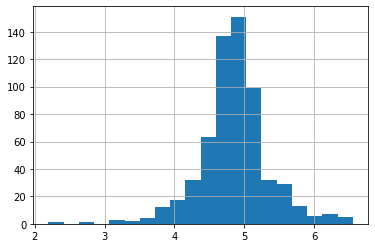

In [ ]:
df_pre['LoanAmount_log']=np.log(df_pre['LoanAmount'])
df_pre['LoanAmount_log'].hist(bins=20)
dftest['LoanAmount_log']=np.log(dftest['LoanAmount'])

In [ ]:
dftest.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_log
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1,4.700480
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1,4.836282
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1,5.337538
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,1,4.605170
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1,4.356709


In [ ]:
X = df_pre.drop('Loan_Status',1)
y = df_pre.Loan_Status

In [ ]:
#logistic
#X = pd.get_dummies(X)
#df_pre=pd.get_dummies(df_pre)
#dftest=pd.get_dummies(dftest)

In [ ]:
from sklearn.model_selection import train_test_split
#x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.metrics import accuracy_score
#model = LogisticRegression()
#model.fit(x_train, y_train)

In [ ]:
#LogisticRegression()

In [ ]:
#pred_cv = model.predict(x_cv)
#accuracy_score(y_cv,pred_cv)

In [ ]:
#pred_test = model.predict(dftest)

In [ ]:
#submission
submission = pd.read_csv('CP462_Final_Project/sample_sub.csv')
submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [ ]:
#test_original = pd.read_csv('CP462_Final_Project/Test_LoanData.csv')
#test_original.head()


In [ ]:
#submission['Loan_Status']=pred_test
#submission['Loan_ID']=test_original['Loan_ID']

In [ ]:
#submission['Loan_Status'].replace(0, 'N', inplace=True)
#submission['Loan_Status'].replace(1, 'Y', inplace=True)

In [ ]:
#pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('CP462_Final_Project/logistic.csv',index = False)

In [ ]:
#pd.DataFrame(df_pre).to_csv('CP462_Final_Project/TrainSam.csv',index = False)

In [ ]:
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [ ]:
#pd.DataFrame(dftest).to_csv('CP462_Final_Project/TestSam.csv',index = False)

In [ ]:
#Dicision Tree
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,stratify=cancer.target, random_state=0)
from sklearn.tree import DecisionTreeClassifier , export_graphviz 
tree = DecisionTreeClassifier(max_depth=2) 
tree.fit(X_train, y_train)
# tree visualization 
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names) 
print(tree_dot)


digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.468\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.134\ngini = 0.081\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.008\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.499\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.142\ngini = 0.202\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.497\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.03\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


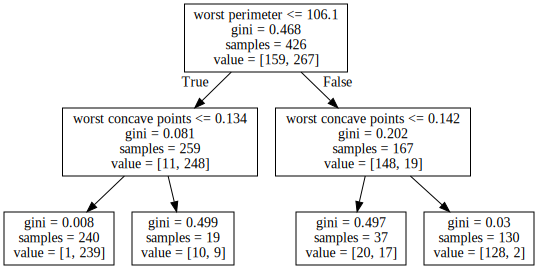

In [ ]:
import graphviz 
graphviz.Source(tree_dot)